In [138]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../Jalnan.ttf' #윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [6]:
house = datasets.load_boston()
house

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
data = pd.DataFrame(house['data'], columns=house['feature_names'])
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
target = pd.DataFrame(house['target'], columns=['Target'])
target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
data.shape, target.shape

((506, 13), (506, 1))

In [18]:
df = pd.concat([data, target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [20]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],
    df['Target'],
    test_size = 0.2,
    random_state = 42
)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [110]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_predict = lr.predict(X_test)
y_predict[:3]

array([28.99672362, 36.02556534, 14.81694405])

### 회귀의 정확도를 나타내는 평가지표는 MAE, MSE, RMSE, R2-score<br>분류의 accuracy와 유사한 것은 R2-score

In [112]:
r2_test_total = r2_score(y_test, y_predict) # test데이터
r2_test_total

0.6687594935356294

In [113]:
mse = mean_squared_error(y_test, y_predict) ## test데이터의 MSE
mse

24.29111947497371

In [114]:
y_predict2 = lr.predict(X_train)

In [115]:
r2_train_total = r2_score(y_train, y_predict2) # train 데이터
r2_train_total

0.7508856358979673

In [116]:
mse2 = mean_squared_error(y_train, y_predict2) ## test데이터의 MSE
mse2

21.641412753226312

In [117]:
rmse1 = np.sqrt(mse) # test
rmse2 = np.sqrt(mse2) # train
print('train>> ', rmse2, ',   test> ', rmse1 )

train>>  4.6520331848801675 ,   test>  4.928602182665355


### tradeoff 관계 => 반대적인 관계를 무르는 말
### r2_score, mse, rmse는 tradeoff 관계

In [118]:
lr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [119]:
lr.intercept_

30.24675099392408

## 상관관계를 고려하여 몇 개의 컬럼을 선정 후,<br> 전체 컬럼을 넣었을 때와 비교해보기

In [120]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [121]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df[['ZN', 'CHAS',  'RM', 'DIS', 'B']],
    df['Target'],
    test_size = 0.2,
    random_state = 42
)

In [122]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((404, 5), (102, 5), (404,), (102,))

In [123]:
lr = LinearRegression()
lr.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_predict2 = lr.predict(X_test2)
y_predict[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [125]:
r2_test_part = r2_score(y_test2, y_predict2) # test데이터
r2_test_part

0.45225595467023283

In [126]:
mse3 = mean_squared_error(y_test2, y_predict2) ## test데이터의 MSE
mse3

40.16814304757125

In [127]:
y_predict3 = lr.predict(X_train2)

In [132]:
r2_train_part = r2_score(y_train2, y_predict3) # train 데이터
r2_train_part

0.592407215518055

In [133]:
mse4 = mean_squared_error(y_train2, y_predict3) ## test데이터의 MSE
mse4

35.40897256569964

In [134]:
rmse3 = np.sqrt(mse3) # test
rmse4 = np.sqrt(mse4) # train
print('train>> ', rmse4, ',   test> ', rmse3 )

train>>  5.95054388822565 ,   test>  6.337834255293464


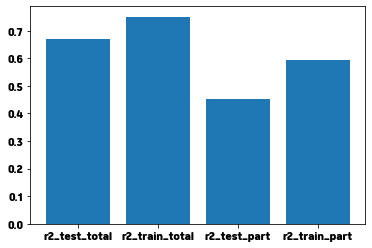

In [135]:
x = np.arange(4)
plt.bar(x, height= [
                    r2_test_total,
                    r2_train_total,
                    r2_test_part,
                    r2_train_part
            ])
plt.xticks(x, ['r2_test_total','r2_train_total', 
               'r2_test_part', 'r2_train_part']);

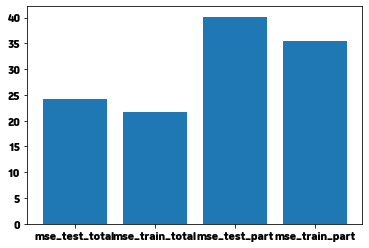

In [137]:
x = np.arange(4)
plt.bar(x, height= [
                    mse,
                    mse2,
                    mse3,
                    mse4
            ])
plt.xticks(x, ['mse_test_total','mse_train_total', 
               'mse_test_part', 'mse_train_part']);

In [139]:
# 선형회귀에 규제를 가한 것.
en = ElasticNet() # L1 + L2
lasso = Lasso() # L1
ridge = Ridge() # L2

In [141]:
en.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [142]:
en_predict = en.predict(X_test)
lasso_predict = lasso.predict(X_test)
ridge_predict = ridge.predict(X_test)

In [143]:
r2_en = r2_score(y_test, en_predict)
r2_lasso = r2_score(y_test, lasso_predict)
r2_ridge = r2_score(y_test, ridge_predict)

In [144]:
mse_en = mean_squared_error(y_test, en_predict)
mse_lasso = mean_squared_error(y_test, lasso_predict)
mse_ridge = mean_squared_error(y_test, ridge_predict)

In [145]:
en_predict2 = en.predict(X_train)
lasso_predict2 = lasso.predict(X_train)
ridge_predict2 = ridge.predict(X_train)

In [146]:
r2_en2 = r2_score(y_train, en_predict2)
r2_lasso2 = r2_score(y_train, lasso_predict2)
r2_ridge2 = r2_score(y_train, ridge_predict2)

In [147]:
mse_en2 = mean_squared_error(y_train, en_predict2)
mse_lasso2 = mean_squared_error(y_train, lasso_predict2)
mse_ridge2 = mean_squared_error(y_train, ridge_predict2)

In [153]:
r2_test_total, r2_train_total 

(0.6687594935356294, 0.7508856358979673)

In [154]:
r2_train_total - r2_test_total #test-train(약간 오버피팅)

0.08212614236233795

In [155]:
mse, mse2

(24.29111947497371, 21.641412753226312)

In [156]:
mse2 - mse #train - test, train이 더 loss가 적었음.

-2.649706721747396

In [157]:
r2_en, r2_lasso, r2_ridge #test

(0.6731556429073877, 0.6671453631686305, 0.6662221670168519)

In [149]:
r2_en2, r2_lasso2, r2_ridge2 #train

(0.6908083499815865, 0.6959153721670908, 0.7487825119234439)

In [158]:
r2_en - r2_en2 #test-train(오버피팅이 완화됨.)

-0.017652707074198748

In [159]:
mse_en, mse_lasso, mse_ridge #test

(23.968733210204793, 24.409489761299696, 24.477191227708673)

In [160]:
mse_en2, mse_lasso2, mse_ridge2 #train

(26.86053107382812, 26.41686667312292, 21.82411829157586)

In [150]:
mse_en, mse_lasso, mse_ridge #test(elastic, lasso규제후, test데이터가 개선됨.)

(23.968733210204793, 24.409489761299696, 24.477191227708673)

In [152]:
mse_en2 - mse_en ##test데이터의 손실률이 적어짐.!

2.891797863623328

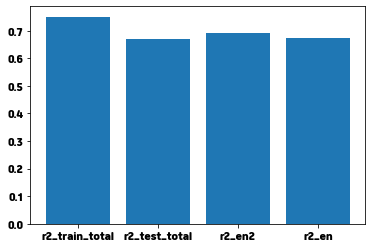

In [168]:
x = np.arange(4)
plt.bar(x, height= [
                    r2_train_total,
                    r2_test_total,
                    r2_en2,
                    r2_en
            ])
plt.xticks(x, ['r2_train_total','r2_test_total', 
               'r2_en2', 'r2_en']);

## 선형회귀에서는 train과 test가 r2_score차이가 많이 나지만<br>L1 + L2 규제에서는 train과 test가 r2_score차이가 줄어든 것을 볼 수 있다.<br>overfitting을 완화시킴